## % Renewable Energy Data, GDP and SJR Ranking Data Visualization of The Top 15 Countries:

1. I have loaded the energy data from the file `Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and has been put into a DataFrame with the variable name of **energy**.

2. I exclude the footer and header information from the datafile. The first two columns are unneccessary, so I get rid of them, and changed the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']`

3. Then Converted `Energy Supply` to Gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "..."), It is reflected as `np.NaN` values.

4. Renaming the following list of countries:

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

5. There are also several countries with numbers and/or parenthesis in their name. So I rename these as following, 

e.g. 

`'Bolivia (Plurinational State of)'` should be `'Bolivia'`, 

`'Switzerland17'` should be `'Switzerland'`.

<br>

6. Next, I load the GDP data from the file `world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Called this DataFrame **GDP**. 

7. I skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

<br>

8. Finally, I load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

9. At last, I join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). And used only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

10. The index of this is the name of the country, and the columns are ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].


In [11]:
import pandas as pd
import numpy as np

def Combined_Data():
    # Reading Energy data:
    df = pd.read_excel('Energy Indicators.xls')
    df = df.iloc[17:244,]
    df = df.drop([df.columns[0], df.columns[1]], axis=1)
    
    # Renaming The Columns.
    old_col = df.columns
    col = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    j = 0
    for i in old_col:
        df.rename(columns={i : col[j]}, inplace=True)
        j = j + 1
    
    # Replacing "..." with NaN
    df.reset_index(inplace=True, drop=True)
    for i in df.columns:
        df[i].replace(to_replace='...', value = np.NaN, inplace=True)
        
    # Converting the Energy Supply values from Petajoule to Gigajoule by a Lambda Function.
    df['Energy Supply'] = df['Energy Supply'].apply(lambda x: x * 1000000)
    
    # Trimming Out any Number or any text in parenthesis to just the country name.
    df['Country'].replace(regex= {r"[0-9]+" : '', r" \(.*\)" : ''}, inplace=True)
    
    # renaming the country name.
    df['Country'].replace(to_replace= {"Republic of Korea": "South Korea",
                                       "United States of America": "United States",
                                       "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
                                       "China, Hong Kong Special Administrative Region": "Hong Kong"},
                          inplace=True)
    
    
    
    # Reading the GDP data and cleaning it:
    gdp = pd.read_csv('world_bank.csv')
    gdp = gdp.iloc[4:,]
    gdp_cols = gdp.columns[-10:] 
    ngdp = pd.DataFrame(gdp['Data Source'])
    j = 1
    for i in gdp_cols:
        ngdp[j] = gdp[i]
        j = j + 1
    ngdp_col = ['Country', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
    j = 0
    for i in ngdp.columns:
        ngdp.rename(columns= {i : ngdp_col[j]}, inplace = True)
        j = j + 1
    ngdp.reset_index(drop=True, inplace=True)
    GDP = ngdp.copy()
    
    
    
    # Reading ScimEn data :
    ScimEn = pd.read_excel('scimagojr-3.xlsx')
    
    
    
    # Merging The above 3 data sets:
    df = df.set_index('Country')
    GDP = GDP.set_index('Country')
    ScimEn = ScimEn.set_index('Country')
    temp = pd.merge(df, GDP, how='left', left_index=True, right_index=True)
    final = pd.merge(temp, ScimEn, how='right', left_index=True, right_index=True)
    
    # Sorting the Top 15 country:
    final.sort_values(by = ['Rank'], inplace=True)
    top = final.iloc[:15,]
    
    return top
Combined_Data()

,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
Country,,,,,,,,,,,,,,,,,,,,
China,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,1,127050,126767,597237,411683,4.70,138
United States,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,2,96661,94747,792274,265436,8.20,230
Japan,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,3,30504,30287,223024,61554,7.31,134
United Kingdom,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,4,20944,20357,206091,37874,9.84,139
Russian Federation,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,5,18534,18301,34266,12422,1.85,57
Canada,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12,6,17899,17620,215003,40930,12.01,149
Germany,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,7,17027,16831,140566,27426,8.26,126
India,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,8,15005,14841,128763,37209,8.58,115
France,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12,9,13153,12973,130632,28601,9.93,114


## Now we Plot The Data to visualize:

In [12]:
def plot():
    import matplotlib as plt
    %matplotlib inline
    Top15 = Combined_Data()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that helps to understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")


This is an example of a visualization that helps to understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


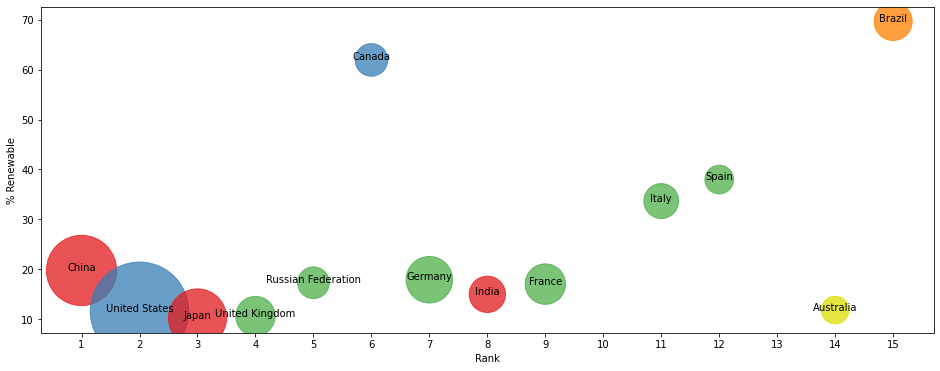

In [13]:
plot()